In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import subprocess

REPO_PATH = subprocess.check_output(['git', 'rev-parse', '--show-toplevel']).decode('utf-8').strip()
plt.style.use(f'{REPO_PATH}/misc/edwin.mplstyle')

In [2]:
## Globals
α = 2.79 #1/m
θs = 0.385
θr = 0.012
n = 7.26
m = 1 - 1/n
Ks = 2.07E-4  #m/s
qtarget = 3.32E-6 #m/s

In [3]:
θ_control = pd.read_excel("../Rosenzweig_2011/.hiddendata/TDR-theta.xlsx", sheet_name="theta_control")

In [4]:
θ_control.tail()

,Time(hr),Q(ml/min),date,hour,θ1,θ2,θ3,θ4,θ5,θ6
133,532,1,NaT,NaN,-0.1406,0.107060,0.124517,0.133489,0.142420,0.112901
134,536,1,NaT,NaN,-0.1406,0.112585,0.116043,0.132260,0.137870,0.119925
135,540,1,NaT,NaN,-0.1406,0.110644,0.123757,0.127539,0.131520,0.114999
136,544,1,NaT,NaN,-0.1406,0.108041,0.122485,0.124010,0.136175,0.111318
137,548,1,NaT,NaN,-0.1406,0.121505,0.122230,0.128789,0.138112,0.128540


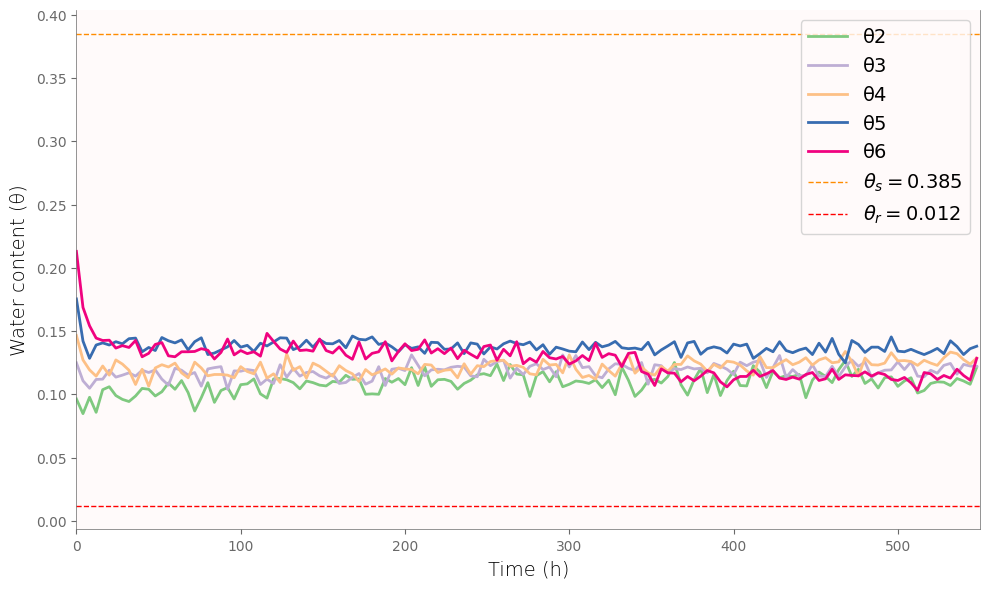

In [13]:
#fig, axs = plt.subplots(1,2, figsize=[10,6], gridspec_kw={"width_ratios":[1,1], "wspace":0.05}, sharey=True)
fig, ax = plt.subplots(figsize=[10,6])
colors = ['#7fc97f','#beaed4','#fdc086','#386cb0','#f0027f']

for i,color in zip(range(2,7),colors):
    θi = f"θ{i}"
    ax.plot(θ_control["Time(hr)"], θ_control[θi], lw=2, alpha=1, c=color, label=f"{θi}")

ax.axhline(y=θs, ls='dashed', lw=1, c='darkorange', label=fr"$\theta_s={θs}$")
ax.axhline(y=θr, ls='dashed', lw=1, c='red', label=fr"$\theta_r={θr}$")
ax.legend(loc='upper right')
ax.set_ylabel("Water content (θ)")
ax.set_xlabel("Time (h)")
ax.set_xlim(0,550)
fig.tight_layout()
plt.show()

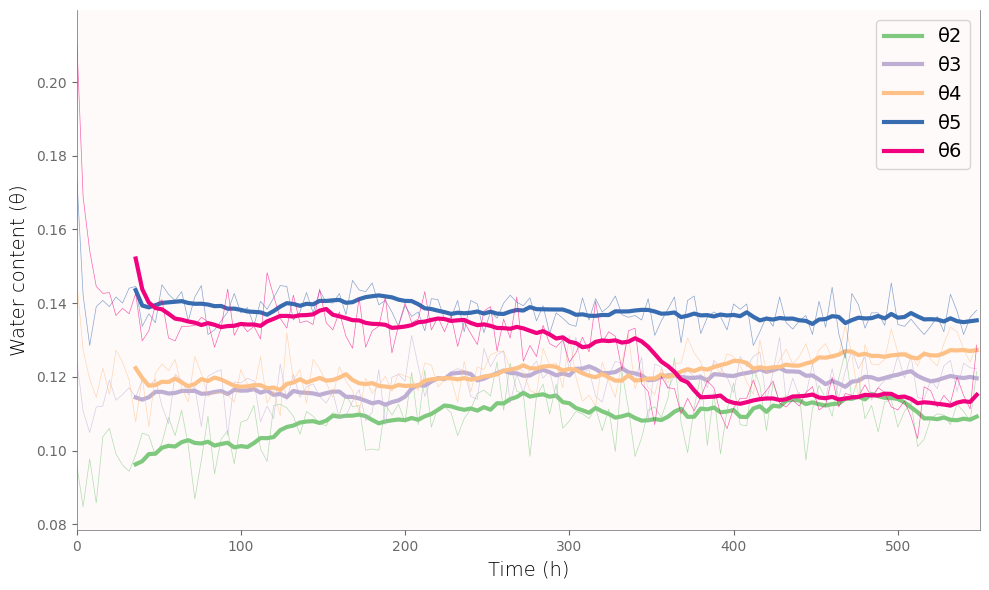

In [14]:
#fig, axs = plt.subplots(1,2, figsize=[10,6], gridspec_kw={"width_ratios":[1,1], "wspace":0.05}, sharey=True)
fig, ax = plt.subplots(figsize=[10,6])
colors = ['#7fc97f','#beaed4','#fdc086','#386cb0','#f0027f']

for i,color in zip(range(2,7),colors):
    θi = f"θ{i}"
    ax.plot(θ_control["Time(hr)"], θ_control[θi], lw=0.5, alpha=0.6, c=color)
    ax.plot(θ_control["Time(hr)"], θ_control[θi].rolling(10).mean(), lw=3, label=f"{θi}", marker="None", alpha=1, c=color)

ax.legend(loc='upper right')
ax.set_ylabel("Water content (θ)")
ax.set_xlabel("Time (h)")
ax.set_xlim(0,550)
fig.tight_layout()
plt.show()

In [15]:
z = np.array([0.52, 0.47, 0.42, 0.37, 0.32])
θ = θ_control[["θ2","θ3","θ4","θ5","θ6"]].to_numpy()
t = θ_control["Time(hr)"].to_numpy()

In [16]:
θ_tmean = np.average(θ[-50:], axis=0)  ## Last 50 hr
θ_dmean = np.average(θ_tmean)  ## Mean over depth

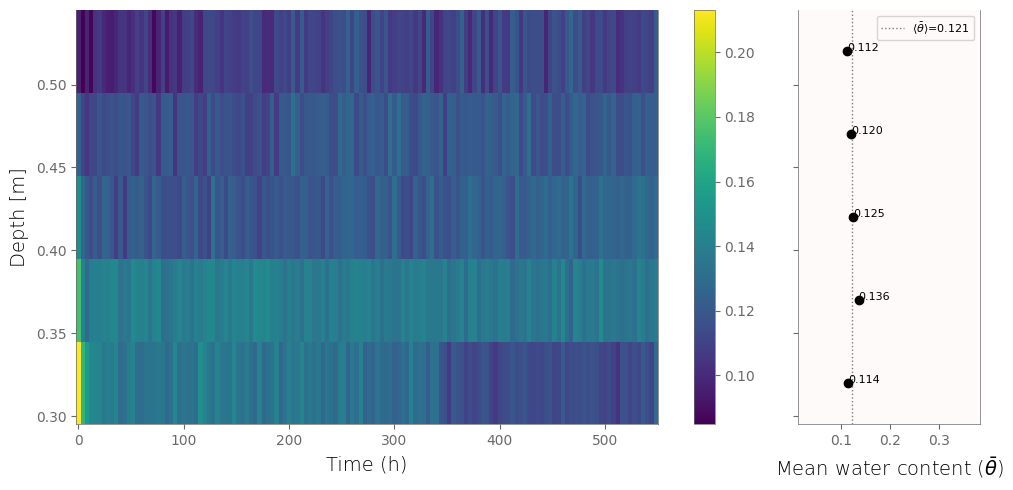

In [20]:
fig,axs = plt.subplots(1,2, figsize=[10,5], gridspec_kw={"width_ratios":[2,0.5]}, sharey=True)

ax = axs[0]
img = ax.pcolormesh(t, z, θ.T)#, vmin=θr, vmax=θs)
plt.colorbar(img, ax=ax)
ax.set_ylabel("Depth [m]")
ax.set_xlabel("Time (h)")

ax = axs[1]
ax.scatter(θ_tmean, z)
for i,j in zip(θ_tmean, z):
    ax.annotate(f"{i:.3f}",[i,j], fontsize=8)
ax.axvline(x=θ_dmean, lw=1, alpha=0.5, ls="dotted", 
    label=rf"$\langle\bar{{\theta}}\rangle$={θ_dmean:.3f}")
ax.set_xlim(θr,θs)
ax.set_xlabel(r"Μean water content ($\bar{θ}$)")
ax.legend(fontsize=8)
fig.tight_layout()
plt.show()